In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## The dataset has been successfully loaded. The columns in the dataset are as follows:
##### CRIM: Per capita crime rate by town
##### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
##### INDUS: Proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##### NOX: Nitric oxide concentration (parts per 10 million)
##### RM: Average number of rooms per dwelling
##### AGE: Proportion of owner-occupied units built prior to 1940
##### DIS: Weighted distances to five Boston employment centres
##### RAD: Index of accessibility to radial highways
##### TAX: Full-value property-tax rate per "USD10,000"
##### PTRATIO: Pupil-teacher ratio by town
##### LSTAT: % lower status of the population
##### MEDV: Median value of owner-occupied homes in $1000s

In [8]:
# Display the first few rows of the data to get an overview
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


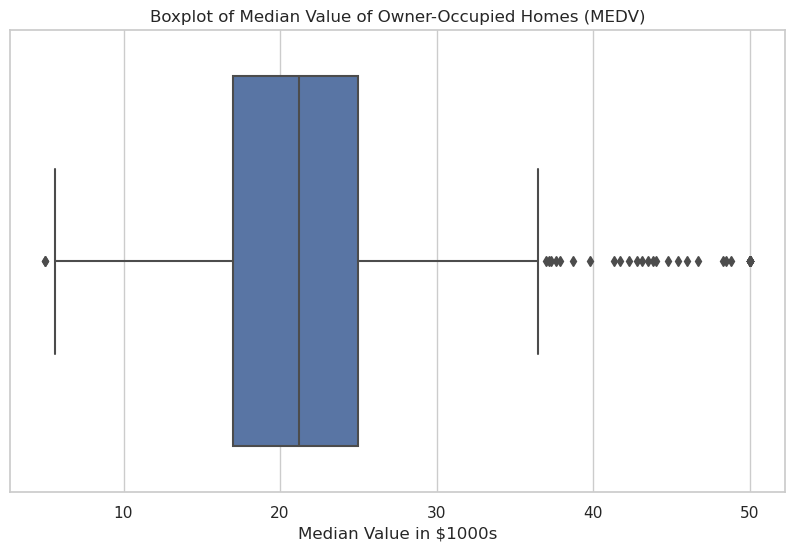

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for the "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value in $1000s')
plt.show()

# Explanation
#### The boxplot for the "Median Value of Owner-Occupied Homes" (MEDV) is displayed above.
###### This plot gives us a good summary of the central tendency, variability, and outliers for the MEDV variable.

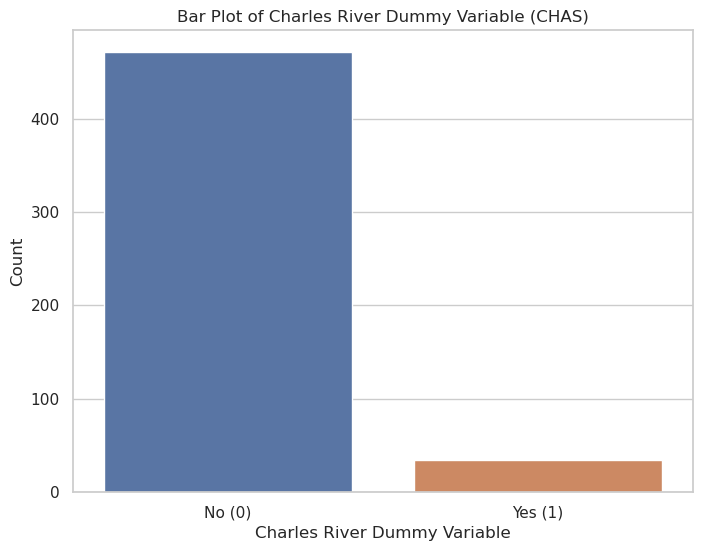

In [11]:
# Create a bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
plt.show()

# Explanation
### The bar plot for the Charles River dummy variable (CHAS) is shown above.
##### This variable indicates whether the tract bounds the Charles River (1) or not (0). As observed, the majority of the tracts do not bound the Charles River.

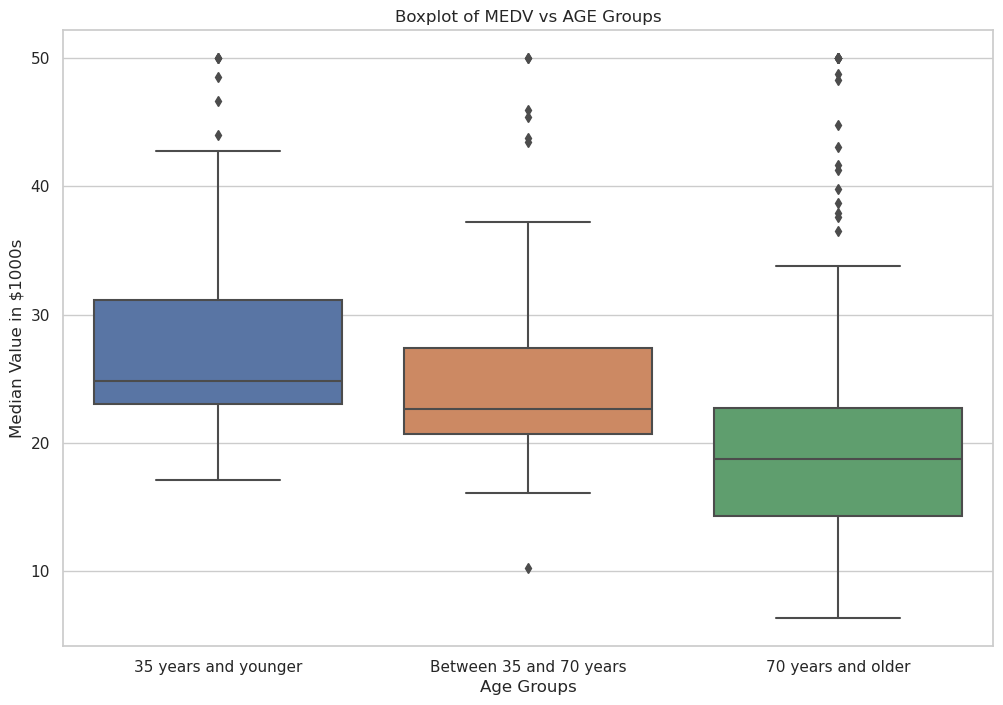

In [14]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot for the MEDV variable vs the discretized AGE variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value in $1000s')
plt.show()


# Explanation
### The boxplot illustrating the relationship between the "Median Value of Owner-Occupied Homes" (MEDV) and the age groups is displayed above.
##### The age groups are categorised as follows:
##### •	35 years and younger
##### •	Between 35 and 70 years
##### •	70 years and older
##### The plot shows some variation in median home values across these age groups, which could suggest a relationship between the age of the homes and their median value.


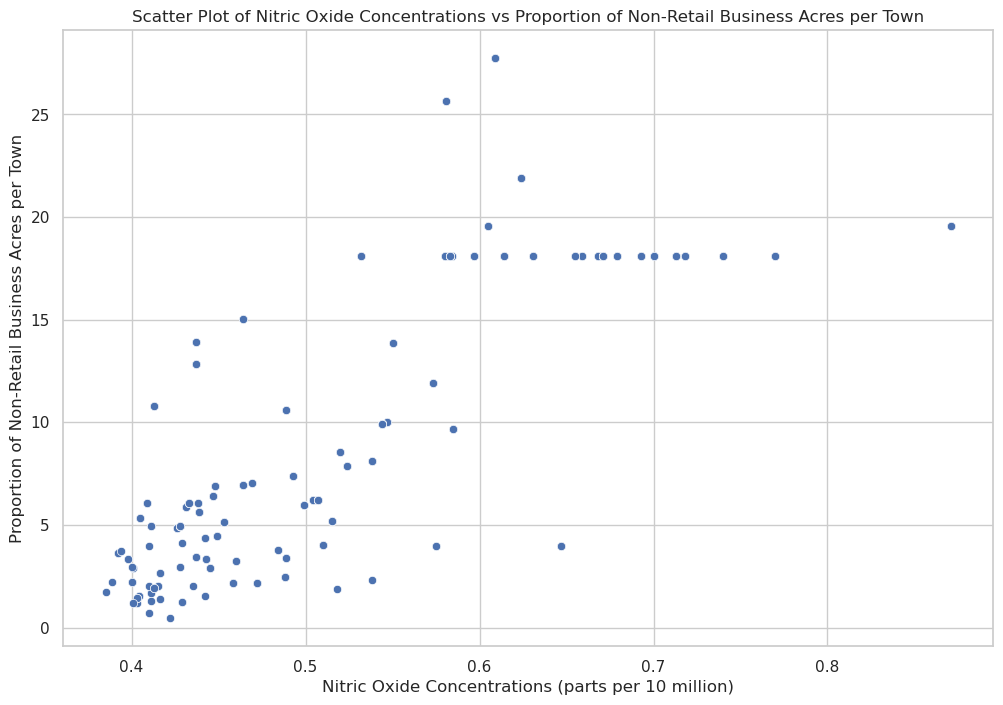

In [15]:
# Create a scatter plot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.figure(figsize=(12, 8))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()


# Explanation
### The scatter plot showing the relationship between Nitric Oxide Concentrations (NOX) and the Proportion of Non-Retail Business Acres per Town (INDUS) is displayed above.
##### Observations:
##### •	There appears to be a positive correlation between Nitric Oxide Concentrations and the Proportion of Non-Retail Business Acres. This suggests that areas with a higher proportion of non-retail business acres are more likely to have higher levels of nitric oxide in the air.


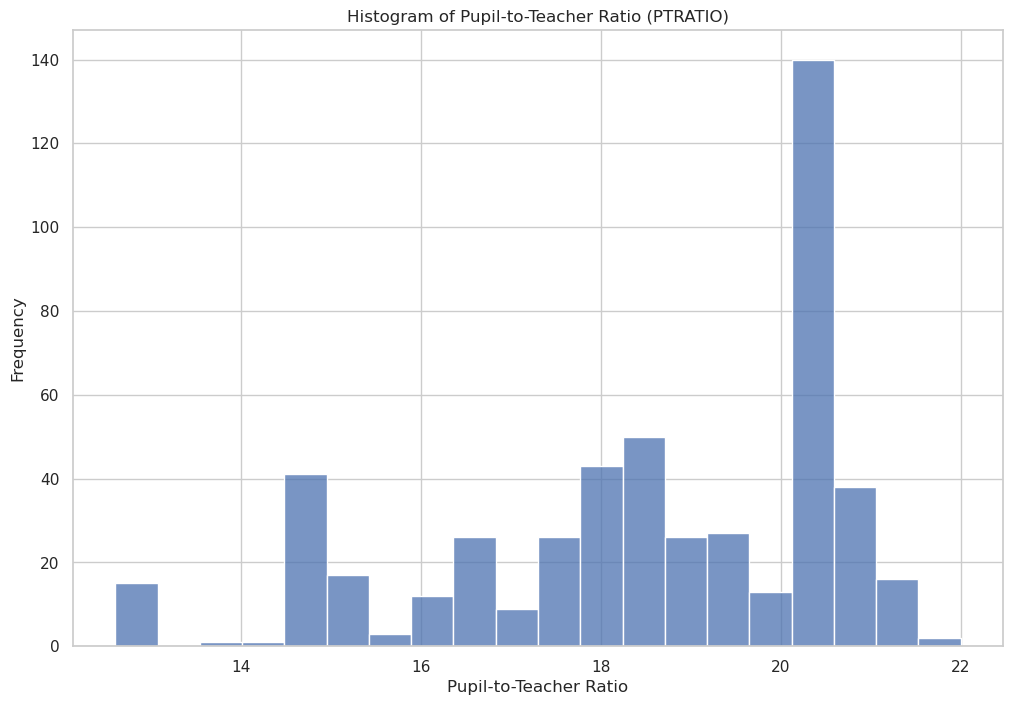

In [17]:
# Create a histogram for the pupil-to-teacher ratio variable (PTRATIO)
plt.figure(figsize=(12, 8))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Explanation
#### The histogram for the Pupil-to-Teacher Ratio (PTRATIO) is shown above. The plot gives an overview of the distribution of this variable across different towns.

# Task 5: Use the appropriate tests to answer the questions provided.

## Task 5.1: T-test for Independent Samples
#### Question: Is there a significant difference in median value of houses bounded by the Charles river or not?
###### Hypothesis:
###### - H0 : There is no significant difference in the median value of houses bounded by the Charles river or not.
###### - H1 : There is a significant difference in the median value of houses bounded by the Charles river or not.

In [21]:
from scipy import stats

# Data preparation
grouped_by_charles = [boston_df['MEDV'][boston_df['CHAS'] == chas_val] for chas_val in boston_df['CHAS'].unique()]

# Perform t-test for independent samples
t_stat, p_val = stats.ttest_ind(*grouped_by_charles)

t_stat, p_val, p_val < 0.05

(-3.996437466090509, 7.390623170519905e-05, True)

## Conclusion:
###### Since the p-value is less than alpha = 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that there is a significant difference in the median value of houses depending on whether they are bounded by the Charles River or not.